## B210 Sawtooth

In [1]:
import os
import torch #, torchvision
import numpy as np
from matplotlib import pyplot
from scipy import signal
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from torch import istft
global GPU, n_fft
GPU = 1
eps = 1e-15
plt.style.use('default')
device = torch.device('cuda:1')
print('Torch version =', torch.__version__, 'CUDA version =', torch.version.cuda)
print('CUDA Device:', device)
print('Is cuda available? =',torch.cuda.is_available())

Torch version = 1.6.0 CUDA version = 10.2
CUDA Device: cuda:1
Is cuda available? = True


In [2]:
# %matplotlib notebook
# %matplotlib inline

#### Machine paths

In [2]:
path_sawtooth_b210 = "/home/david/sigMF_ML/RF/sawtooth_testdata/B210/" # ACE
path_sawtooth_b210_10amp = "/home/david/sigMF_ML/RF/sawtooth_testdata/B210_10amp/" # ACE

#### Read in files as complex

In [3]:
msps_1 = 1e6
msps_5 = 5e6
msps_10 = 10e6
msps_25 = 25e6

In [4]:
fft_1msps = 1024
fft_5msps = 1024*5
fft_10msps = 1024*10
fft_25msps = 1024*25

In [5]:
saw_1msps_complex = np.fromfile(path_sawtooth_b210+"saw_1msps_b210_new.sigmf-data", np.complex64)
saw_5msps_complex = np.fromfile(path_sawtooth_b210+"saw_5msps_b210_new.sigmf-data", np.complex64)
saw_10msps_complex = np.fromfile(path_sawtooth_b210+"saw_10msps_b210_new.sigmf-data", np.complex64)
saw_25msps_complex = np.fromfile(path_sawtooth_b210+"saw_25msps_b210_new.sigmf-data", np.complex64)

In [6]:
saw_1msps_angle = np.angle(saw_1msps_complex)
saw_5msps_angle = np.angle(saw_5msps_complex)
saw_10msps_angle = np.angle(saw_10msps_complex)
saw_25msps_angle = np.angle(saw_25msps_complex)

In [7]:
path_plot_fig = "/home/david/sigMF_ML/RF/RF_class/plot_data/" # ACE
os.chdir(path_plot_fig)

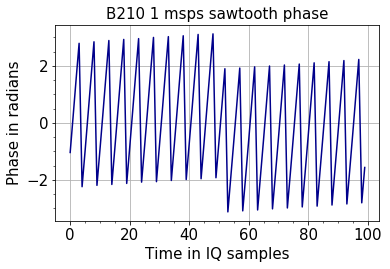

In [8]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
# pyplot.plot(saw_1msps_angle[0:len(saw_1msps_angle)], color ='darkblue')
pyplot.plot(saw_1msps_angle[0:100], color ='darkblue')
# plt.legend(loc='lower right', fontsize=13)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('B210 1 msps sawtooth phase', fontsize=15)
plt.xlabel('Time in IQ samples')
plt.ylabel('Phase in radians')
plt.grid()
plt.minorticks_on()
# plt.yticks([.2, .4, .6, .8, 1.0])
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
# plt.tight_layout()
axes=plt.gca()
# axes.set_aspect(7)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('saw_phase_1msps_b210_20220323.png', format="png")
pyplot.show()

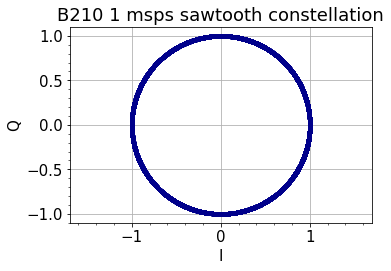

In [9]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
r = saw_1msps_complex[200000:220000]
r = np.exp(1j*np.angle(r))
# r = r1 / np.linalg.norm(r1)
plt.plot(np.real(r), np.imag(r), '.',color ='darkblue')
# plt.yticks([-1, -.5, 0, .5, 1])
# plt.xticks([-1, -.5, 0, .5, 1])
plt.minorticks_on()
plt.title('B210 1 msps sawtooth constellation')
plt.xlabel('I')
plt.ylabel('Q')
plt.grid(True)
plt.axis('equal')
plt.subplots_adjust(left=0.20)
plt.subplots_adjust(bottom=0.20)
# fig1.set_size_inches(6.0, 4.0)
fig1.savefig('sawtooth_1msps_b210_constellation_20220323.png', format="png")
pyplot.show()

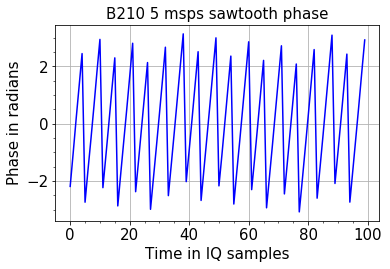

In [10]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
# pyplot.plot(saw_5msps_angle[100:len(saw_5msps_angle)], color ='blue')
pyplot.plot(saw_5msps_angle[0:100], color ='blue')
# pyplot.plot(saw_5msps_10amp_angle[100:75000], color ='blue')
# pyplot.plot(saw_5msps_10amp_angle[2999900:3000000], color ='blue')
# pyplot.plot(saw_1msps_angle[520:580], color ='blue')
# plt.legend(loc='lower right', fontsize=13)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('B210 5 msps sawtooth phase', fontsize=15)
plt.xlabel('Time in IQ samples')
plt.ylabel('Phase in radians')
plt.grid()
plt.minorticks_on()
# plt.yticks([.2, .4, .6, .8, 1.0])
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
# plt.tight_layout()
axes=plt.gca()
# axes.set_aspect(7)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('sawtooth_phase_5msps_b210_20220323.png', format="png")
pyplot.show()

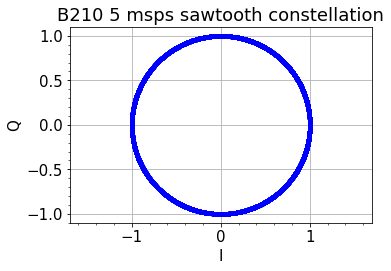

In [11]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
r = saw_5msps_complex[200000:220000]
r = np.exp(1j*np.angle(r))
# r = r1 / np.linalg.norm(r1)
plt.plot(np.real(r), np.imag(r), '.',color ='blue')
# plt.yticks([-1, -.5, 0, .5, 1])
# plt.xticks([-1, -.5, 0, .5, 1])
plt.minorticks_on()
plt.title('B210 5 msps sawtooth constellation')
plt.xlabel('I')
plt.ylabel('Q')
plt.grid(True)
plt.axis('equal')
plt.subplots_adjust(left=0.20)
plt.subplots_adjust(bottom=0.20)
# fig1.set_size_inches(6.0, 4.0)
fig1.savefig('sawtooth_5msps_b210_constellation_20220323.png', format="png")
pyplot.show()

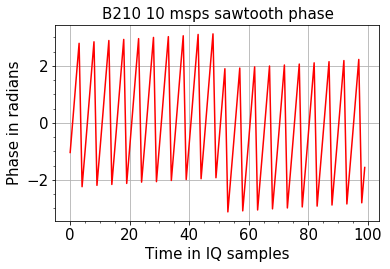

In [12]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
# pyplot.plot(saw_10msps_10amp_angle[100:len(saw_10msps_10amp_angle)], color ='red')
pyplot.plot(saw_1msps_angle[0:100], color ='red')
# plt.legend(loc='lower right', fontsize=13)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('B210 10 msps sawtooth phase', fontsize=15)
plt.xlabel('Time in IQ samples')
plt.ylabel('Phase in radians')
plt.grid()
plt.minorticks_on()
# plt.yticks([.2, .4, .6, .8, 1.0])
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
# plt.tight_layout()
axes=plt.gca()
# axes.set_aspect(7)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('sawtooth_phase_10msps_b210_20220323.png', format="png")
pyplot.show()

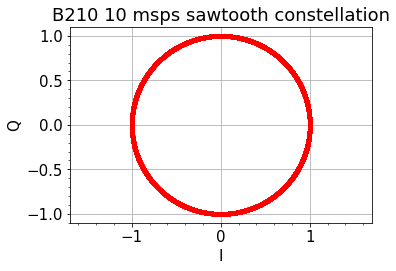

In [13]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
r = saw_10msps_complex[200000:220000]
r = np.exp(1j*np.angle(r))
# r = r1 / np.linalg.norm(r1)
plt.plot(np.real(r), np.imag(r), '.',color ='red')
# plt.yticks([-1, -.5, 0, .5, 1])
# plt.xticks([-1, -.5, 0, .5, 1])
plt.minorticks_on()
plt.title('B210 10 msps sawtooth constellation')
plt.xlabel('I')
plt.ylabel('Q')
plt.grid(True)
plt.axis('equal')
plt.subplots_adjust(left=0.20)
plt.subplots_adjust(bottom=0.20)
# fig1.set_size_inches(6.0, 4.0)
fig1.savefig('sawtooth_10msps_b210_constellation_20220323.png', format="png")
pyplot.show()

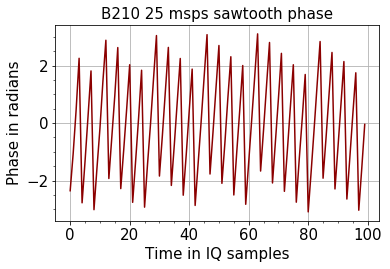

In [14]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
# pyplot.plot(saw_25msps_10amp_angle[10:100], color ='darkred')
# pyplot.plot(saw_25msps_10amp_angle[100:len(saw_25msps_10amp_angle)], color ='darkred')
pyplot.plot(saw_25msps_angle[100:200], color ='darkred')
# pyplot.plot(saw_1msps_angle[520:580], color ='darkblue')
# plt.legend(loc='lower right', fontsize=13)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('B210 25 msps sawtooth phase', fontsize=15)
plt.xlabel('Time in IQ samples')
plt.ylabel('Phase in radians')
plt.grid()
plt.minorticks_on()
# plt.yticks([.2, .4, .6, .8, 1.0])
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
# plt.tight_layout()
axes=plt.gca()
# axes.set_aspect(7)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.20)
fig1.set_size_inches(6.0, 4.0)
fig1.savefig('sawtooth_phase_25msps_b210_20220323.png', format="png")
pyplot.show()

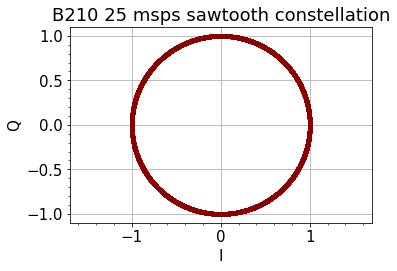

In [15]:
plt.rcParams.update({'font.size': 15})
fig1 = plt.figure()
r = saw_25msps_complex[200000:220000]
r = np.exp(1j*np.angle(r))
# r = r1 / np.linalg.norm(r1)
plt.plot(np.real(r), np.imag(r), '.',color ='darkred')
# plt.yticks([-1, -.5, 0, .5, 1])
# plt.xticks([-1, -.5, 0, .5, 1])
plt.minorticks_on()
plt.title('B210 25 msps sawtooth constellation')
plt.xlabel('I')
plt.ylabel('Q')
plt.grid(True)
plt.axis('equal')
plt.subplots_adjust(left=0.20)
plt.subplots_adjust(bottom=0.20)
# fig1.set_size_inches(6.0, 4.0)
fig1.savefig('sawtooth_25msps_b210_constellation_20220323.png', format="png")
pyplot.show()